In [2]:
from io import StringIO

import numpy as np
import pandas as pd
import seaborn as sns

In [3]:
cd /mnt/data_sm/olga/kmer-hashing/quest-for-orthologs/data/2019/

/mnt/data_sm/olga/kmer-hashing/quest-for-orthologs/data/2019


In [4]:
ll

total 2641289
drwxr-xr-x 5 olga       4096 Dec 26 19:44 Archaea/
drwxr-xr-x 5 olga      16384 Dec 26 19:44 Bacteria/
drwxr-xr-x 6 olga      32768 Dec 26 19:49 Eukaryota/
-rw-r--r-- 1 olga 2704585887 Dec 25 18:46 QfO_release_2019_04.tar.gz
-rw-r--r-- 1 olga      18280 May 10  2019 README
-rw-r--r-- 1 olga      12169 Jan  7 11:13 species_metadata.csv


In [5]:
cat README


Universal Protein Resource (UniProt)


The Universal Protein Resource (UniProt), a collaboration between the European
Bioinformatics Institute (EBI), the SIB Swiss Institute of Bioinformatics, and
the Protein Information Resource (PIR), is comprised of three databases, each
optimized for different uses. The UniProt Knowledgebase (UniProtKB) is the
central access point for extensively curated protein information, including
function, classification and cross-references. The UniProt Reference Clusters
(UniRef) combine closely related sequences into a single record to speed up
sequence similarity searches. The UniProt Archive (UniParc) is a comprehensive
repository of all protein sequences, consisting only of unique identifiers and
sequences.


Reference Proteomes QfO release

Some proteomes have been (manually and algorithmically) selected as reference
proteomes. They cover well-studied model organisms and other organisms of
interest for biomedical research and phylogeny.

Based on UniPr

# Make Species dataframe

In [6]:
s =  '''Proteome_ID Tax_ID  OSCODE     #(1)    #(2)    #(3)  Species Name
UP000007062 7165    ANOGA     12553     971   13619  Anopheles gambiae (African malaria mosquito)
UP000000798 224324  AQUAE      1553       0    1557  Aquifex aeolicus (strain VF5)
UP000006548 3702    ARATH     27475   14123   41920  Arabidopsis thaliana (Mouse-ear cress)
UP000001570 224308  BACSU      4260       7    4268  Bacillus subtilis (strain 168)
UP000001414 226186  BACTN      4782       0    4823  Bacteroides thetaiotaomicron (strain ATCC 29148 / DSM 2079 / NCTC 10582 / E50 / VPI-5482)
UP000007241 684364  BATDJ      8610       0    8685  Batrachochytrium dendrobatidis (strain JAM81 / FGSC 10211) (Frog chytrid fungus)
UP000009136 9913    BOVIN     23774   14534   38438  Bos taurus (Bovine)
UP000002526 224911  BRADU      8253       0    8314  Bradyrhizobium diazoefficiens (strain JCM 10833 / IAM 13628 / NBRC 14792 / USDA 110)
UP000001554 7739    BRAFL     28542       2   28608  Branchiostoma floridae (Florida lancelet) (Amphioxus)
UP000001940 6239    CAEEL     19986    8309   28507  Caenorhabditis elegans
UP000000559 237561  CANAL      6035       1    6051  Candida albicans (strain SC5314 / ATCC MYA-2876) (Yeast)
UP000002254 9615    CANLF     20271    5269   25631  Canis lupus familiaris (Dog) (Canis familiaris)
UP000000431 272561  CHLTR       895       0     895  Chlamydia trachomatis (strain D/UW-3/Cx)
UP000006906 3055    CHLRE     17614    1214   19033  Chlamydomonas reinhardtii (Chlamydomonas smithii)
UP000002008 324602  CHLAA      3850       0    3853  Chloroflexus aurantiacus (strain ATCC 29366 / DSM 635 / J-10-fl)
UP000008144 7719    CIOIN     16678     631   17317  Ciona intestinalis (Transparent sea squirt) (Ascidia intestinalis)
UP000002149 214684  CRYNJ      6604     142    6773  Cryptococcus neoformans var. neoformans serotype D (strain JEC21 / ATCC MYA-565) (Filobasidiella neoformans)
UP000000437 7955    DANRE     25939   21219   47517  Danio rerio (Zebrafish) (Brachydanio rerio)
UP000002524 243230  DEIRA      3085       0    3103  Deinococcus radiodurans (strain ATCC 13939 / DSM 20539 / JCM 16871 / LMG 4051 / NBRC 15346 / NCIMB 9279 / R1 / VKM B-1422)
UP000007719 515635  DICTD      1743       0    1744  Dictyoglomus turgidum (strain Z-1310 / DSM 6724)
UP000002195 44689   DICDI     12739      27   13120  Dictyostelium discoideum (Slime mold)
UP000000803 7227    DROME     13788    9516   23457  Drosophila melanogaster (Fruit fly)
UP000000625 83333   ECOLI      4391      12    8529  Escherichia coli (strain K12)
UP000002521 190304  FUSNN      2046       0    2064  Fusobacterium nucleatum subsp. nucleatum (strain ATCC 25586 / CIP 101130 / JCM 8532 / LMG 13131)
UP000000539 9031    CHICK     18124    9932   28206  Gallus gallus (Chicken)
UP000000577 243231  GEOSL      3402       0    3433  Geobacter sulfurreducens (strain ATCC 51573 / DSM 12127 / PCA)
UP000001548 184922  GIAIC      7154       0    7364  Giardia intestinalis (strain ATCC 50803 / WB clone C6) (Giardia lamblia)
UP000000557 251221  GLOVI      4406       0    4427  Gloeobacter violaceus (strain ATCC 29082 / PCC 7421)
UP000001519 9595    GORGO     21795   22932   44943  Gorilla gorilla gorilla (Western lowland gorilla)
UP000000554 64091   HALSA      2426       0    2607  Halobacterium salinarum (strain ATCC 700922 / JCM 11081 / NRC-1) (Halobacterium halobium)
UP000000429 85962   HELPY      1553       0    1577  Helicobacter pylori (strain ATCC 700392 / 26695) (Campylobacter pylori)
UP000015101 6412    HELRO     23328       0   23433  Helobdella robusta (Californian leech)
UP000005640 9606    HUMAN     21146   74769   96332  Homo sapiens (Human)
UP000001555 6945    IXOSC     20473       0   20482  Ixodes scapularis (Black-legged tick) (Deer tick)
UP000001686 374847  KORCO      1602       0    1602  Korarchaeum cryptofilum (strain OPF8)
UP000000542 5664    LEIMA      8038       0    8315  Leishmania major
UP000018468 7918    LEPOC     18320    4140   22480  Lepisosteus oculatus (Spotted gar)
UP000001408 189518  LEPIN      3676       0    3707  Leptospira interrogans serogroup Icterohaemorrhagiae serovar Lai (strain 56601)
UP000000805 243232  METJA      1787       0    1788  Methanocaldococcus jannaschii (strain ATCC 43067 / DSM 2661 / JAL-1 / JCM 10045 / NBRC 100440) (Methanococcus jannaschii)
UP000002487 188937  METAC      4468       0    4540  Methanosarcina acetivorans (strain ATCC 35395 / DSM 2834 / JCM 12185 / C2A)
UP000002280 13616   MONDO     21276     968   22319  Monodelphis domestica (Gray short-tailed opossum)
UP000001357 81824   MONBE      9188       0    9204  Monosiga brevicollis (Choanoflagellate)
UP000000589 10090   MOUSE     22287   40369   63134  Mus musculus (Mouse)
UP000001584 83332   MYCTU      3993       4    5634  Mycobacterium tuberculosis (strain ATCC 25618 / H37Rv)
UP000000807 243273  MYCGE       483       0     483  Mycoplasma genitalium (strain ATCC 33530 / G-37 / NCTC 10195)
UP000000425 122586  NEIMB      2001       0    2062  Neisseria meningitidis serogroup B (strain MC58)
UP000001593 45351   NEMVE     24429      15   24622  Nematostella vectensis (Starlet sea anemone)
UP000002530 330879  ASPFU      9647       0    9652  Neosartorya fumigata (strain ATCC MYA-4609 / Af293 / CBS 101355 / FGSC A1100) (Aspergillus fumigatus)
UP000001805 367110  NEUCR      9759     508   10271  Neurospora crassa (strain ATCC 24698 / 74-OR23-1A / CBS 708.71 / DSM 1257 / FGSC 987)
UP000000792 436308  NITMS      1795       0    1795  Nitrosopumilus maritimus (strain SCM1)
UP000059680 39947   ORYSJ     43858    5369   51020  Oryza sativa subsp. japonica (Rice)
UP000001038 8090    ORYLA     23617   12536   36234  Oryzias latipes (Japanese rice fish) (Japanese killifish)
UP000002277 9598    PANTR     23006   25788   49266  Pan troglodytes (Chimpanzee)
UP000000600 5888    PARTE     39461       0   39753  Paramecium tetraurelia
UP000001055 321614  PHANO     15998       0   16008  Phaeosphaeria nodorum (strain SN15 / ATCC MYA-4574 / FGSC 10173) (Glume blotch fungus) (Parastagonospora nodorum)
UP000006727 3218    PHYPA     30792      66   31878  Physcomitrella patens subsp. patens (Moss)
UP000005238 164328  PHYRM     15349       0   15605  Phytophthora ramorum (Sudden oak death agent)
UP000001450 36329   PLAF7      5448       1    5463  Plasmodium falciparum (isolate 3D7)
UP000002438 208964  PSEAE      5563       2    5576  Pseudomonas aeruginosa (strain ATCC 15692 / DSM 22644 / CIP 104116 / JCM 14847 / LMG 12228 / 1C / PRS 101 / PAO1)
UP000008783 418459  PUCGT     15689     119   15920  Puccinia graminis f. sp. tritici (strain CRL 75-36-700-3 / race SCCL) (Black stem rust fungus)
UP000002494 10116   RAT       21678    9885   32629  Rattus norvegicus (Rat)
UP000001025 243090  RHOBA      7271       0    7325  Rhodopirellula baltica (strain DSM 10527 / NCIMB 13988 / SH1)
UP000001974 273057  SACS2      2938       0    2995  Saccharolobus solfataricus (strain ATCC 35092 / DSM 1617 / JCM 11322 / P2) (Sulfolobus solfataricus)
UP000002311 559292  YEAST      6049      28    6082  Saccharomyces cerevisiae (strain ATCC 204508 / S288c) (Baker's yeast)
UP000002485 284812  SCHPO      5141       9    5154  Schizosaccharomyces pombe (strain 972 / ATCC 24843) (Fission yeast)
UP000001312 665079  SCLS1     14445       0   14472  Sclerotinia sclerotiorum (strain ATCC 18683 / 1980 / Ss-1) (White mold) (Whetzelinia sclerotiorum)
UP000001973 100226  STRCO      8038       1    8154  Streptomyces coelicolor (strain ATCC BAA-471 / A3(2) / M145)
UP000001425 1111708 SYNY3      3507       0    3565  Synechocystis sp. (strain PCC 6803 / Kazusa)
UP000001449 35128   THAPS     11717       1   11762  Thalassiosira pseudonana (Marine diatom) (Cyclotella nana)
UP000000536 69014   THEKO      2301       0    2305  Thermococcus kodakarensis (strain ATCC BAA-918 / JCM 12380 / KOD1) (Pyrococcus kodakaraensis (strain KOD1))
UP000000718 289376  THEYD      1982       0    2033  Thermodesulfovibrio yellowstonii (strain ATCC 51303 / DSM 11347 / YP87)
UP000008183 243274  THEMA      1852       0    2872  Thermotoga maritima (strain ATCC 43589 / MSB8 / DSM 3109 / JCM 10099)
UP000007266 7070    TRICA     16579    1926   18539  Tribolium castaneum (Red flour beetle)
UP000001542 5722    TRIVA     50190       0   59533  Trichomonas vaginalis
UP000000561 237631  USTMA      6788      18    6809  Ustilago maydis (strain 521 / FGSC 9021) (Corn smut fungus)
UP000008143 8364    XENTR     24386    5307   29884  Xenopus tropicalis (Western clawed frog) (Silurana tropicalis)
UP000001300 284591  YARLI      6449       5    6477  Yarrowia lipolytica (strain CLIB 122 / E 150) (Yeast) (Candida lipolytica)
UP000007305 4577    MAIZE     39448   59948  100330  Zea mays (Maize)'''

species = pd.read_fwf(StringIO(s))
species = species.rename(columns={"#(1)": 'n_main_fasta_canonical',
                                  "#(2)": 'n_additional_fasta_isoforms',
                                  "#(3)": 'n_gene2acc'})
# Sanitize columns
species.columns = species.columns.str.lower().str.replace(' ', '_')
print(species.shape)
species.head()

(78, 7)


,proteome_id,tax_id,oscode,n_main_fasta_canonical,n_additional_fasta_isoforms,n_gene2acc,species_name
0,UP000007062,7165,ANOGA,12553,971,13619,Anopheles gambiae (African malaria mosquito)
1,UP000000798,224324,AQUAE,1553,0,1557,Aquifex aeolicus (strain VF5)
2,UP000006548,3702,ARATH,27475,14123,41920,Arabidopsis thaliana (Mouse-ear cress)
3,UP000001570,224308,BACSU,4260,7,4268,Bacillus subtilis (strain 168)
4,UP000001414,226186,BACTN,4782,0,4823,Bacteroides thetaiotaomicron (strain ATCC 2914...


In [7]:
cd Eukaryota/

/mnt/data_sm/olga/kmer-hashing/quest-for-orthologs/data/2019/Eukaryota


In [8]:
ls -lha | head -n 20

total 15G
drwxr-xr-x 6 olga czb    32K Dec 26 19:49 ./
drwxr-xr-x 5 olga root  4.0K Jan  7 11:13 ../
drwxr-xr-x 2 olga czb   4.0K Dec 26 19:44 human-protein-fastas/
drwxr-xr-x 2 olga czb   4.0K Dec 26 19:49 human-protein-fastas-concatenated/
drwxr-xr-x 2 olga czb   8.0K Dec 26 19:44 not-human-protein-fastas/
drwxr-xr-x 2 olga czb   8.0K Dec 26 19:51 protein-fastas/
-rw-r--r-- 1 olga czb    14M Apr 11  2019 UP000000437_7955_additional.fasta
-rw-r--r-- 1 olga czb    42M Apr 13  2019 UP000000437_7955_DNA.fasta
-rw-r--r-- 1 olga czb   2.6K Apr 13  2019 UP000000437_7955_DNA.miss
-rw-r--r-- 1 olga czb    16M Apr 11  2019 UP000000437_7955.fasta
-rw-r--r-- 1 olga czb   387M May  6  2019 UP000000437_7955_gcoord.xml
-rw-r--r-- 1 olga czb   2.5M Apr 11  2019 UP000000437_7955.gene2acc
-rw-r--r-- 1 olga czb    30M May  3  2019 UP000000437_7955.idmapping
-rw-r--r-- 1 olga czb    96M May 10  2019 UP000000437_7955.xml
-rw-r--r-- 1 olga czb   8.6M Apr 11  2019 UP000000539_9031_additional.fasta
-rw-r--r

In [9]:
! head UP000000437_7955.gene2acc

-	A0A0J9YJK1	-
-	A0A0J9YJH4	-
-	A0A0J9YJF6	-
-	A0A0J9YJD3	-
-	A0A0J9YJD0	-
-	A0A0J9YJA9	-
-	A0A0J9YJ97	-
-	A0A0J9YJ90	-
-	A0A0J9YJ89	-
-	A0A0J9YJ87	-


In [10]:
! shuf UP000000437_7955.gene2acc | head

ENSDARG00000107431	A0A286YA46	ENSDARG00000107431
ZFIN:ZDB-GENE-050417-314	Q561T9	ZFIN:ZDB-GENE-050417-314
ZFIN:ZDB-GENE-051127-45	F1R1Q6	ZFIN:ZDB-GENE-051127-45
ZFIN:ZDB-GENE-160114-86	E7FFA4	ZFIN:ZDB-GENE-160114-86
ZFIN:ZDB-GENE-060929-704	A9UH06	ZFIN:ZDB-GENE-060929-704
ZFIN:ZDB-GENE-021015-1	Q6PH19	ZFIN:ZDB-GENE-021015-1
ZFIN:ZDB-GENE-070705-466	A0A0R4IC03	ZFIN:ZDB-GENE-070705-466
-	A0A0R4IX31	-
ZFIN:ZDB-GENE-040426-1513	Q6NWF1	ZFIN:ZDB-GENE-040426-1513
ZFIN:ZDB-GENE-041210-278	A0A0R4IKX2	ZFIN:ZDB-GENE-041210-278
shuf: write error: Broken pipe
shuf: write error


In [11]:
gene2acc = pd.read_csv('UP000000437_7955.gene2acc', sep='\t', header=None, na_values='-')
print(gene2acc.shape)
gene2acc.head()

(47517, 3)


,0,1,2
0,NaN,A0A0J9YJK1,NaN
1,NaN,A0A0J9YJH4,NaN
2,NaN,A0A0J9YJF6,NaN
3,NaN,A0A0J9YJD3,NaN
4,NaN,A0A0J9YJD0,NaN


In [12]:
gene2acc.loc[gene2acc[0].notnull()]

,0,1,2
1848,ENSDARG00000001937,F1QYH9,ENSDARG00000001937
1849,ENSDARG00000002797,F1QNN1,ENSDARG00000002797
1850,ENSDARG00000003041,E7F8I1,ENSDARG00000003041
1851,ENSDARG00000003803,E7F0K1,ENSDARG00000003803
1852,ENSDARG00000003803,E7F5U5,ENSDARG00000003803
...,...,...,...
47512,terf2ip,Q6NYJ3,terf2ip
47513,terf2ip,Q6NYJ3-2,terf2ip
47514,tmc2b,F1QZE9,tmc2b
47515,ttc19,A4QP73,ttc19


## Print list of species to make dictionary

In [13]:
# for x in species.species_name.values:
#     print(f'"{x}": 0,')

# Get divergence times from human

Look up human + other species, use median time from [timetree.org](http://timetree.org/)

In [14]:

# In millions of years
timetree_divergence_from_human = {
    "Anopheles gambiae (African malaria mosquito)": 797,
    "Aquifex aeolicus (strain VF5)": 4290,
    "Arabidopsis thaliana (Mouse-ear cress)": 1496,
    "Bacillus subtilis (strain 168)": 4290,
    "Bacteroides thetaiotaomicron (strain ATCC 29148 / DSM 2079 / NCTC 10582 / E50 / VPI-5482)": 4290,
    "Batrachochytrium dendrobatidis (strain JAM81 / FGSC 10211) (Frog chytrid fungus)": 1105,
    "Bos taurus (Bovine)": 96,
    "Bradyrhizobium diazoefficiens (strain JCM 10833 / IAM 13628 / NBRC 14792 / USDA 110)": 4290,
    "Branchiostoma floridae (Florida lancelet) (Amphioxus)": 684,
    "Caenorhabditis elegans": 797,
    "Candida albicans (strain SC5314 / ATCC MYA-2876) (Yeast)": 1105,
    "Canis lupus familiaris (Dog) (Canis familiaris)": 96,
    "Chlamydia trachomatis (strain D/UW-3/Cx)": 4290,
    "Chlamydomonas reinhardtii (Chlamydomonas smithii)": 1496,
    "Chloroflexus aurantiacus (strain ATCC 29366 / DSM 635 / J-10-fl)": 4290,
    "Ciona intestinalis (Transparent sea squirt) (Ascidia intestinalis)": 676,
    "Cryptococcus neoformans var. neoformans serotype D (strain JEC21 / ATCC MYA-565) (Filobasidiella neoformans)": 1105,
    "Danio rerio (Zebrafish) (Brachydanio rerio)": 435,
    "Deinococcus radiodurans (strain ATCC 13939 / DSM 20539 / JCM 16871 / LMG 4051 / NBRC 15346 / NCIMB 9279 / R1 / VKM B-1422)": 4290,
    "Dictyoglomus turgidum (strain Z-1310 / DSM 6724)": 4290,
    "Dictyostelium discoideum (Slime mold)": 1480,
    "Drosophila melanogaster (Fruit fly)": 797,
    "Escherichia coli (strain K12)": 4290,
    "Fusobacterium nucleatum subsp. nucleatum (strain ATCC 25586 / CIP 101130 / JCM 8532 / LMG 13131)": 4290,
    "Gallus gallus (Chicken)": 312,
    "Geobacter sulfurreducens (strain ATCC 51573 / DSM 12127 / PCA)": 4290,
    "Giardia intestinalis (strain ATCC 50803 / WB clone C6) (Giardia lamblia)": 2101,
    "Gloeobacter violaceus (strain ATCC 29082 / PCC 7421)": 4290,
    "Gorilla gorilla gorilla (Western lowland gorilla)": 9.06,
    "Halobacterium salinarum (strain ATCC 700922 / JCM 11081 / NRC-1) (Halobacterium halobium)": 4290,
    "Helicobacter pylori (strain ATCC 700392 / 26695) (Campylobacter pylori)": 4290,
    "Helobdella robusta (Californian leech)": 797,
    "Homo sapiens (Human)": 0,
    "Ixodes scapularis (Black-legged tick) (Deer tick)": 797,
    "Korarchaeum cryptofilum (strain OPF8)": 4290,
    "Leishmania major": 1660,
    "Lepisosteus oculatus (Spotted gar)": 435,
    "Leptospira interrogans serogroup Icterohaemorrhagiae serovar Lai (strain 56601)": 4290,
    "Methanocaldococcus jannaschii (strain ATCC 43067 / DSM 2661 / JAL-1 / JCM 10045 / NBRC 100440) (Methanococcus jannaschii)": 4290,
    "Methanosarcina acetivorans (strain ATCC 35395 / DSM 2834 / JCM 12185 / C2A)": 4290,
    "Monodelphis domestica (Gray short-tailed opossum)": 159,
    "Monosiga brevicollis (Choanoflagellate)": 1023,
    "Mus musculus (Mouse)": 90,
    "Mycobacterium tuberculosis (strain ATCC 25618 / H37Rv)": 4290,
    "Mycoplasma genitalium (strain ATCC 33530 / G-37 / NCTC 10195)": 4290,
    "Neisseria meningitidis serogroup B (strain MC58)": 4290,
    "Nematostella vectensis (Starlet sea anemone)": 824,
    "Neosartorya fumigata (strain ATCC MYA-4609 / Af293 / CBS 101355 / FGSC A1100) (Aspergillus fumigatus)": 1105,
    "Neurospora crassa (strain ATCC 24698 / 74-OR23-1A / CBS 708.71 / DSM 1257 / FGSC 987)": 1105,
    "Nitrosopumilus maritimus (strain SCM1)": 4290,
    "Oryza sativa subsp. japonica (Rice)": 1496,
    "Oryzias latipes (Japanese rice fish) (Japanese killifish)": 435,
    "Pan troglodytes (Chimpanzee)": 6.7,
    "Paramecium tetraurelia": 1768,
    "Phaeosphaeria nodorum (strain SN15 / ATCC MYA-4574 / FGSC 10173) (Glume blotch fungus) (Parastagonospora nodorum)": 1105,
    "Physcomitrella patens subsp. patens (Moss)": 1496,
    "Phytophthora ramorum (Sudden oak death agent)": 1768,
    "Plasmodium falciparum (isolate 3D7)": 1768,
    "Pseudomonas aeruginosa (strain ATCC 15692 / DSM 22644 / CIP 104116 / JCM 14847 / LMG 12228 / 1C / PRS 101 / PAO1)": 4290,
    "Puccinia graminis f. sp. tritici (strain CRL 75-36-700-3 / race SCCL) (Black stem rust fungus)": 1105,
    "Rattus norvegicus (Rat)": 90,
    "Rhodopirellula baltica (strain DSM 10527 / NCIMB 13988 / SH1)": 4290,
    "Saccharolobus solfataricus (strain ATCC 35092 / DSM 1617 / JCM 11322 / P2) (Sulfolobus solfataricus)": 4290,
    "Saccharomyces cerevisiae (strain ATCC 204508 / S288c) (Baker's yeast)": 1105,
    "Schizosaccharomyces pombe (strain 972 / ATCC 24843) (Fission yeast)": 1105,
    "Sclerotinia sclerotiorum (strain ATCC 18683 / 1980 / Ss-1) (White mold) (Whetzelinia sclerotiorum)": 1105,
    "Streptomyces coelicolor (strain ATCC BAA-471 / A3(2) / M145)": 4290,
    "Synechocystis sp. (strain PCC 6803 / Kazusa)": 4290,
    "Thalassiosira pseudonana (Marine diatom) (Cyclotella nana)": 1768,
    "Thermococcus kodakarensis (strain ATCC BAA-918 / JCM 12380 / KOD1) (Pyrococcus kodakaraensis (strain KOD1))": 4290,
    "Thermodesulfovibrio yellowstonii (strain ATCC 51303 / DSM 11347 / YP87)": 4290,
    "Thermotoga maritima (strain ATCC 43589 / MSB8 / DSM 3109 / JCM 10099)": 4290,
    "Tribolium castaneum (Red flour beetle)": 797,
    "Trichomonas vaginalis": 1660,
    "Ustilago maydis (strain 521 / FGSC 9021) (Corn smut fungus)": 1105,
    "Xenopus tropicalis (Western clawed frog) (Silurana tropicalis)": 351.8,
    "Yarrowia lipolytica (strain CLIB 122 / E 150) (Yeast) (Candida lipolytica)": 1105,
    "Zea mays (Maize)": 1496,
}
divergence = pd.Series(timetree_divergence_from_human, name='divergence_from_human_mya')
divergence.head()

Anopheles gambiae (African malaria mosquito)                                                  797.0
Aquifex aeolicus (strain VF5)                                                                4290.0
Arabidopsis thaliana (Mouse-ear cress)                                                       1496.0
Bacillus subtilis (strain 168)                                                               4290.0
Bacteroides thetaiotaomicron (strain ATCC 29148 / DSM 2079 / NCTC 10582 / E50 / VPI-5482)    4290.0
Name: divergence_from_human_mya, dtype: float64

In [15]:
species.head()

,proteome_id,tax_id,oscode,n_main_fasta_canonical,n_additional_fasta_isoforms,n_gene2acc,species_name
0,UP000007062,7165,ANOGA,12553,971,13619,Anopheles gambiae (African malaria mosquito)
1,UP000000798,224324,AQUAE,1553,0,1557,Aquifex aeolicus (strain VF5)
2,UP000006548,3702,ARATH,27475,14123,41920,Arabidopsis thaliana (Mouse-ear cress)
3,UP000001570,224308,BACSU,4260,7,4268,Bacillus subtilis (strain 168)
4,UP000001414,226186,BACTN,4782,0,4823,Bacteroides thetaiotaomicron (strain ATCC 2914...


## Join with divergence series

In [16]:
species_with_divergence = species.join(divergence, on='species_name')
print(species_with_divergence.shape)
species_with_divergence.head()

(78, 8)


,proteome_id,tax_id,oscode,n_main_fasta_canonical,n_additional_fasta_isoforms,n_gene2acc,species_name,divergence_from_human_mya
0,UP000007062,7165,ANOGA,12553,971,13619,Anopheles gambiae (African malaria mosquito),797.0
1,UP000000798,224324,AQUAE,1553,0,1557,Aquifex aeolicus (strain VF5),4290.0
2,UP000006548,3702,ARATH,27475,14123,41920,Arabidopsis thaliana (Mouse-ear cress),1496.0
3,UP000001570,224308,BACSU,4260,7,4268,Bacillus subtilis (strain 168),4290.0
4,UP000001414,226186,BACTN,4782,0,4823,Bacteroides thetaiotaomicron (strain ATCC 2914...,4290.0


## Plot divergence time sampling

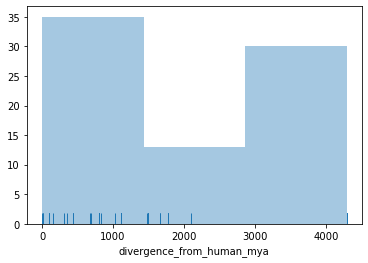

In [17]:
sns.distplot(species_with_divergence.divergence_from_human_mya, rug=True, kde=False)

In [18]:
species_with_divergence.divergence_from_human_mya.describe()

count      78.000000
mean     2229.712308
std      1698.390247
min         0.000000
25%       797.000000
50%      1496.000000
75%      4290.000000
max      4290.000000
Name: divergence_from_human_mya, dtype: float64

In [19]:
quantiles = species_with_divergence.divergence_from_human_mya.quantile(np.arange(0, 1, step=.2))
quantiles

0.0       0.0
0.2     797.0
0.4    1105.0
0.6    1834.6
0.8    4290.0
Name: divergence_from_human_mya, dtype: float64

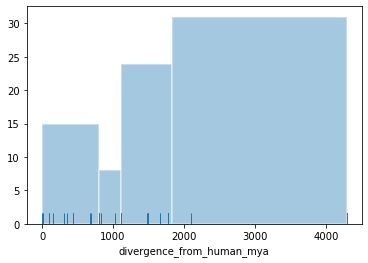

In [20]:
sns.distplot(species_with_divergence.divergence_from_human_mya, rug=True, kde=False, 
             bins=quantiles, hist_kws=dict(linewidth=2, edgecolor='white'))

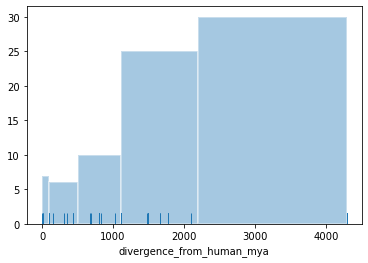

In [21]:
vmax = species_with_divergence.divergence_from_human_mya.max()
bins = [0, 
        
        # Mammals-sh
        100, 
        500, 
        
        # Metazoa?
#         797,
        
        # Divergence with fungus
        1105, 
        2200, 
       
        # DIvergence with bacteria
        4290
       ]

sns.distplot(species_with_divergence.divergence_from_human_mya, rug=True, kde=False, 
             bins=bins, hist_kws=dict(linewidth=2, edgecolor='white'))

## Plot number of sequences vs divergence time

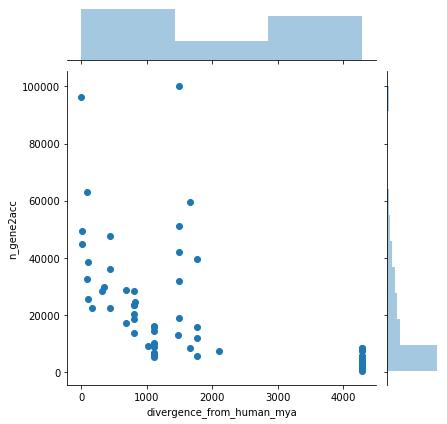

In [22]:
sns.jointplot('divergence_from_human_mya', 'n_gene2acc', species_with_divergence)

# Clean species names

In [23]:
species_with_divergence['scientific_name'] = species_with_divergence.species_name.str.split(' \(').str[0]
species_with_divergence['common_name_or_strain'] = species_with_divergence.species_name.str.split(' \(').str[1].str.split('\)').str[0]
species_with_divergence.head()

,proteome_id,tax_id,oscode,n_main_fasta_canonical,n_additional_fasta_isoforms,n_gene2acc,species_name,divergence_from_human_mya,scientific_name,common_name_or_strain
0,UP000007062,7165,ANOGA,12553,971,13619,Anopheles gambiae (African malaria mosquito),797.0,Anopheles gambiae,African malaria mosquito
1,UP000000798,224324,AQUAE,1553,0,1557,Aquifex aeolicus (strain VF5),4290.0,Aquifex aeolicus,strain VF5
2,UP000006548,3702,ARATH,27475,14123,41920,Arabidopsis thaliana (Mouse-ear cress),1496.0,Arabidopsis thaliana,Mouse-ear cress
3,UP000001570,224308,BACSU,4260,7,4268,Bacillus subtilis (strain 168),4290.0,Bacillus subtilis,strain 168
4,UP000001414,226186,BACTN,4782,0,4823,Bacteroides thetaiotaomicron (strain ATCC 2914...,4290.0,Bacteroides thetaiotaomicron,strain ATCC 29148 / DSM 2079 / NCTC 10582 / E5...


In [24]:
species_with_divergence.sample(10)

,proteome_id,tax_id,oscode,n_main_fasta_canonical,n_additional_fasta_isoforms,n_gene2acc,species_name,divergence_from_human_mya,scientific_name,common_name_or_strain
61,UP000001025,243090,RHOBA,7271,0,7325,Rhodopirellula baltica (strain DSM 10527 / NCI...,4290.00,Rhodopirellula baltica,strain DSM 10527 / NCIMB 13988 / SH1
35,UP000000542,5664,LEIMA,8038,0,8315,Leishmania major,1660.00,Leishmania major,NaN
19,UP000007719,515635,DICTD,1743,0,1744,Dictyoglomus turgidum (strain Z-1310 / DSM 6724),4290.00,Dictyoglomus turgidum,strain Z-1310 / DSM 6724
34,UP000001686,374847,KORCO,1602,0,1602,Korarchaeum cryptofilum (strain OPF8),4290.00,Korarchaeum cryptofilum,strain OPF8
58,UP000002438,208964,PSEAE,5563,2,5576,Pseudomonas aeruginosa (strain ATCC 15692 / DS...,4290.00,Pseudomonas aeruginosa,strain ATCC 15692 / DSM 22644 / CIP 104116 / J...
27,UP000000557,251221,GLOVI,4406,0,4427,Gloeobacter violaceus (strain ATCC 29082 / PCC...,4290.00,Gloeobacter violaceus,strain ATCC 29082 / PCC 7421
55,UP000006727,3218,PHYPA,30792,66,31878,Physcomitrella patens subsp. patens (Moss),1496.00,Physcomitrella patens subsp. patens,Moss
59,UP000008783,418459,PUCGT,15689,119,15920,Puccinia graminis f. sp. tritici (strain CRL 7...,1105.00,Puccinia graminis f. sp. tritici,strain CRL 75-36-700-3 / race SCCL
46,UP000001593,45351,NEMVE,24429,15,24622,Nematostella vectensis (Starlet sea anemone),824.00,Nematostella vectensis,Starlet sea anemone
28,UP000001519,9595,GORGO,21795,22932,44943,Gorilla gorilla gorilla (Western lowland gorilla),9.06,Gorilla gorilla gorilla,Western lowland gorilla


In [25]:
pwd

'/mnt/data_sm/olga/kmer-hashing/quest-for-orthologs/data/2019/Eukaryota'

In [26]:
cd ..

/mnt/data_sm/olga/kmer-hashing/quest-for-orthologs/data/2019


In [27]:
species_with_divergence.to_csv('species_metadata.csv', index=False)